In [1]:
using Catalyst
ecomodel = @reaction_network begin
    Œ±‚ÇÅ*(1 - 0.01*üêú - 0.05*üê∏), üêú --> 2üêú
    Œ±‚ÇÇ*(1 - 0.1*üê¨), üêú --> üê∏
    Œ¥‚ÇÅ, üêú --> ‚àÖ
    Œ¥‚ÇÇ, üê∏ --> üê¨
    Œ¥‚ÇÉ, üê¨ --> ‚àÖ
    end Œ±‚ÇÅ Œ±‚ÇÇ Œ¥‚ÇÅ Œ¥‚ÇÇ Œ¥‚ÇÉ


Model ##ReactionSystem#257 with 5 equations
States (3):
  üêú(t)
  üê∏(t)
  üê¨(t)
Parameters (5):
  Œ±‚ÇÅ
  Œ±‚ÇÇ
  Œ¥‚ÇÅ
  Œ¥‚ÇÇ
  Œ¥‚ÇÉ

In [2]:
using Latexify
odes = convert(ODESystem, ecomodel)
latexify(odes)


L"\begin{align}
\frac{düêú(t)}{dt} =& \alpha{_1} \left( 1 -0.01 üêú\left( t \right) -0.05 üê∏\left( t \right) \right) üêú\left( t \right) -1 \delta{_1} üêú\left( t \right) -1 \alpha{_2} üêú\left( t \right) \left( 1 -0.1 üê¨\left( t \right) \right) \\
\frac{düê∏(t)}{dt} =& \alpha{_2} üêú\left( t \right) \left( 1 -0.1 üê¨\left( t \right) \right) -1 \delta{_2} üê∏\left( t \right) \\
\frac{düê¨(t)}{dt} =& \delta{_2} üê∏\left( t \right) -1 \delta{_3} üê¨\left( t \right)
\end{align}
"

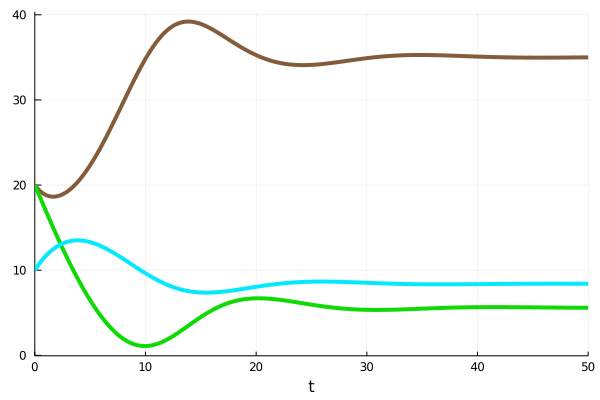

In [3]:
using DifferentialEquations, Plots

cc = ["#835C3B" "#10DA05" "#05E9FF"]

## Parameters [Œ±‚ÇÅ Œ±‚ÇÇ Œ¥‚ÇÅ Œ¥‚ÇÇ Œ¥‚ÇÉ]
p = (0.2, 0.15, 0.05, 0.15, 0.1)
u‚ÇÄ = [20., 20., 10.]
tspan = (0., 50.)

# create the ODEProblem 
ds = ODEProblem(ecomodel, u‚ÇÄ, tspan, p)

sol = solve(ds, Tsit5())
plot(sol, lw=4, lc=cc, legend=false)



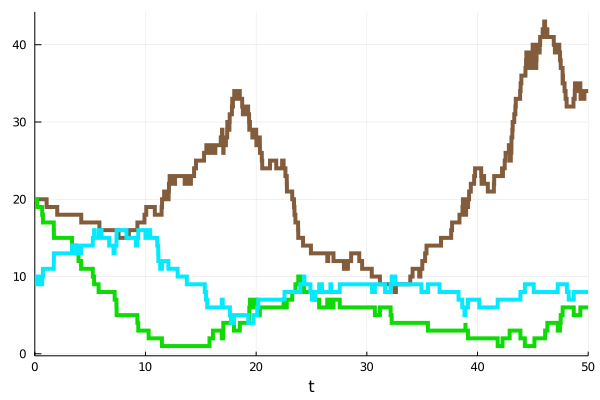

In [4]:
ds_discrete = DiscreteProblem(ecomodel, [20,20,10], tspan, p)
jump_ds = JumpProblem(ecomodel, ds_discrete, Direct())

sol = solve(jump_ds, SSAStepper())
plot(sol, lw=4, lc=cc, legend=false)


In [5]:
import SymPy 

üêú, üê∏, üê¨ = SymPy.@vars üêú üê∏ üê¨
Œ±‚ÇÅ, Œ±‚ÇÇ, Œ¥‚ÇÅ, Œ¥‚ÇÇ, Œ¥‚ÇÉ, g‚ÇÅ, g‚ÇÇ, g‚ÇÉ = SymPy.@vars Œ±‚ÇÅ Œ±‚ÇÇ Œ¥‚ÇÅ Œ¥‚ÇÇ Œ¥‚ÇÉ g‚ÇÅ g‚ÇÇ g‚ÇÉ

rhs = [Œ±‚ÇÅ*üêú*(1 - g‚ÇÅ*üêú - g‚ÇÇ*üê∏) - Œ±‚ÇÇ*üêú - Œ¥‚ÇÅ*üêú,
       Œ±‚ÇÇ*üêú*(1 - g‚ÇÉ*üê¨) - Œ¥‚ÇÇ*üê∏,
       Œ¥‚ÇÇ*üê∏ - Œ¥‚ÇÉ*üê¨]

fps = SymPy.solve(rhs, [üêú,üê∏,üê¨])


3-element Array{Tuple{SymPy.Sym,SymPy.Sym,SymPy.Sym},1}:
 (0, 0, 0)
 ((-g‚ÇÅ*Œ±‚ÇÅ*Œ¥‚ÇÇ*Œ¥‚ÇÉ - g‚ÇÇ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÉ + g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÇ - g‚ÇÉ*Œ±‚ÇÇ^2*Œ¥‚ÇÇ - g‚ÇÉ*Œ±‚ÇÇ*Œ¥‚ÇÅ*Œ¥‚ÇÇ - sqrt(g‚ÇÅ^2*Œ±‚ÇÅ^2*Œ¥‚ÇÇ^2*Œ¥‚ÇÉ^2 + 2*g‚ÇÅ*g‚ÇÇ*Œ±‚ÇÅ^2*Œ±‚ÇÇ*Œ¥‚ÇÇ*Œ¥‚ÇÉ^2 + 2*g‚ÇÅ*g‚ÇÉ*Œ±‚ÇÅ^2*Œ±‚ÇÇ*Œ¥‚ÇÇ^2*Œ¥‚ÇÉ - 2*g‚ÇÅ*g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ^2*Œ¥‚ÇÇ^2*Œ¥‚ÇÉ - 2*g‚ÇÅ*g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÅ*Œ¥‚ÇÇ^2*Œ¥‚ÇÉ + g‚ÇÇ^2*Œ±‚ÇÅ^2*Œ±‚ÇÇ^2*Œ¥‚ÇÉ^2 - 2*g‚ÇÇ*g‚ÇÉ*Œ±‚ÇÅ^2*Œ±‚ÇÇ^2*Œ¥‚ÇÇ*Œ¥‚ÇÉ + 2*g‚ÇÇ*g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ^3*Œ¥‚ÇÇ*Œ¥‚ÇÉ + 2*g‚ÇÇ*g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ^2*Œ¥‚ÇÅ*Œ¥‚ÇÇ*Œ¥‚ÇÉ + g‚ÇÉ^2*Œ±‚ÇÅ^2*Œ±‚ÇÇ^2*Œ¥‚ÇÇ^2 - 2*g‚ÇÉ^2*Œ±‚ÇÅ*Œ±‚ÇÇ^3*Œ¥‚ÇÇ^2 - 2*g‚ÇÉ^2*Œ±‚ÇÅ*Œ±‚ÇÇ^2*Œ¥‚ÇÅ*Œ¥‚ÇÇ^2 + g‚ÇÉ^2*Œ±‚ÇÇ^4*Œ¥‚ÇÇ^2 + 2*g‚ÇÉ^2*Œ±‚ÇÇ^3*Œ¥‚ÇÅ*Œ¥‚ÇÇ^2 + g‚ÇÉ^2*Œ±‚ÇÇ^2*Œ¥‚ÇÅ^2*Œ¥‚ÇÇ^2))/(2*g‚ÇÅ*g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÇ), (g‚ÇÅ*Œ±‚ÇÅ*Œ¥‚ÇÇ*Œ¥‚ÇÉ + g‚ÇÇ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÉ + g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÇ - g‚ÇÉ*Œ±‚ÇÇ^2*Œ¥‚ÇÇ - g‚ÇÉ*Œ±‚ÇÇ*Œ¥‚ÇÅ*Œ¥‚ÇÇ + sqrt(g‚ÇÅ^2*Œ±‚ÇÅ^2*Œ¥‚ÇÇ^2*Œ¥‚ÇÉ^2 + 2*g‚ÇÅ*g‚ÇÇ*Œ±‚ÇÅ^2*Œ±‚ÇÇ*Œ¥‚ÇÇ*Œ¥‚ÇÉ^2 + 2*g‚Ç

In [6]:
J = rhs.jacobian([üêú,üê∏,üê¨])


3√ó3 Array{SymPy.Sym,2}:
 -g‚ÇÅ‚ãÖŒ±‚ÇÅ‚ãÖüêú + Œ±‚ÇÅ‚ãÖ(-g‚ÇÅ‚ãÖüêú - g‚ÇÇ‚ãÖüê∏ + 1) - Œ±‚ÇÇ - Œ¥‚ÇÅ  -g‚ÇÇ‚ãÖŒ±‚ÇÅ‚ãÖüêú         0
                             Œ±‚ÇÇ‚ãÖ(-g‚ÇÉ‚ãÖüê¨ + 1)       -Œ¥‚ÇÇ  -g‚ÇÉ‚ãÖŒ±‚ÇÇ‚ãÖüêú
                                          0        Œ¥‚ÇÇ       -Œ¥‚ÇÉ

In [7]:
## Select a fixed point
nfp = 2

## Substitute fixed point values [x1,x2,x3]
J_fp = J.subs([(üêú,fps[nfp][1]),(üê∏,fps[nfp][2]),(üê¨,fps[nfp][3])])


3√ó3 Array{SymPy.Sym,2}:
 Œ±‚ÇÅ*(1 - (-g‚ÇÅ*Œ±‚ÇÅ*Œ¥‚ÇÇ*Œ¥‚ÇÉ - g‚ÇÇ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÉ + g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÇ - g‚ÇÉ*Œ±‚ÇÇ^2*Œ¥‚ÇÇ - g‚ÇÉ*Œ±‚ÇÇ*Œ¥‚ÇÅ*Œ¥‚ÇÇ - sqrt(g‚ÇÅ^2*Œ±‚ÇÅ^2*Œ¥‚ÇÇ^2*Œ¥‚ÇÉ^2 + 2*g‚ÇÅ*g‚ÇÇ*Œ±‚ÇÅ^2*Œ±‚ÇÇ*Œ¥‚ÇÇ*Œ¥‚ÇÉ^2 + 2*g‚ÇÅ*g‚ÇÉ*Œ±‚ÇÅ^2*Œ±‚ÇÇ*Œ¥‚ÇÇ^2*Œ¥‚ÇÉ - 2*g‚ÇÅ*g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ^2*Œ¥‚ÇÇ^2*Œ¥‚ÇÉ - 2*g‚ÇÅ*g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÅ*Œ¥‚ÇÇ^2*Œ¥‚ÇÉ + g‚ÇÇ^2*Œ±‚ÇÅ^2*Œ±‚ÇÇ^2*Œ¥‚ÇÉ^2 - 2*g‚ÇÇ*g‚ÇÉ*Œ±‚ÇÅ^2*Œ±‚ÇÇ^2*Œ¥‚ÇÇ*Œ¥‚ÇÉ + 2*g‚ÇÇ*g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ^3*Œ¥‚ÇÇ*Œ¥‚ÇÉ + 2*g‚ÇÇ*g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ^2*Œ¥‚ÇÅ*Œ¥‚ÇÇ*Œ¥‚ÇÉ + g‚ÇÉ^2*Œ±‚ÇÅ^2*Œ±‚ÇÇ^2*Œ¥‚ÇÇ^2 - 2*g‚ÇÉ^2*Œ±‚ÇÅ*Œ±‚ÇÇ^3*Œ¥‚ÇÇ^2 - 2*g‚ÇÉ^2*Œ±‚ÇÅ*Œ±‚ÇÇ^2*Œ¥‚ÇÅ*Œ¥‚ÇÇ^2 + g‚ÇÉ^2*Œ±‚ÇÇ^4*Œ¥‚ÇÇ^2 + 2*g‚ÇÉ^2*Œ±‚ÇÇ^3*Œ¥‚ÇÅ*Œ¥‚ÇÇ^2 + g‚ÇÉ^2*Œ±‚ÇÇ^2*Œ¥‚ÇÅ^2*Œ¥‚ÇÇ^2))/(2*g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÇ) - (g‚ÇÅ*Œ±‚ÇÅ*Œ¥‚ÇÇ*Œ¥‚ÇÉ + g‚ÇÇ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÉ + g‚ÇÉ*Œ±‚ÇÅ*Œ±‚ÇÇ*Œ¥‚ÇÇ - g‚ÇÉ*Œ±‚ÇÇ^2*Œ¥‚ÇÇ - g‚ÇÉ*Œ±‚ÇÇ*Œ¥‚ÇÅ*Œ¥‚ÇÇ + sqrt(g‚ÇÅ^2*Œ±‚ÇÅ^2*Œ¥‚ÇÇ^2*Œ¥‚ÇÉ^2 + 2*g‚ÇÅ*g‚ÇÇ*Œ±‚ÇÅ^2*Œ±‚ÇÇ*Œ¥‚ÇÇ*Œ¥‚ÇÉ^2 + 2*g‚ÇÅ*g‚ÇÉ*Œ±‚ÇÅ^2*Œ±‚ÇÇ*Œ¥‚ÇÇ^2*Œ¥‚ÇÉ - 

In [8]:
rhs

3-element Array{SymPy.Sym,1}:
 Œ±‚ÇÅ‚ãÖüêú‚ãÖ(-g‚ÇÅ‚ãÖüêú - g‚ÇÇ‚ãÖüê∏ + 1) - Œ±‚ÇÇ‚ãÖüêú - Œ¥‚ÇÅ‚ãÖüêú
               Œ±‚ÇÇ‚ãÖüêú‚ãÖ(-g‚ÇÉ‚ãÖüê¨ + 1) - Œ¥‚ÇÇ‚ãÖüê∏
                           Œ¥‚ÇÇ‚ãÖüê∏ - Œ¥‚ÇÉ‚ãÖüê¨

In [9]:
## Substitute parameter values 
par = [0.2, 0.5, 0.5, 0.1, 0.7, 0.1, 0.05, 0.02]
J_eval = J_fp.subs([(Œ±‚ÇÅ,par[1]),(Œ±‚ÇÇ,par[2]),(Œ¥‚ÇÅ,par[3]),(Œ¥‚ÇÇ,par[4]),(Œ¥‚ÇÉ,par[5]),(g‚ÇÅ,par[6]),(g‚ÇÇ,par[7]),(g‚ÇÉ,par[8])])


3√ó3 Array{SymPy.Sym,2}:
               1.87116274011642‚ãÖ‚àö2 + 2.85  ‚Ä¶                                  0
 0.207142857142857 - 0.267308962873775‚ãÖ‚àö2     0.935581370058212‚ãÖ‚àö2 + 1.425
                                             0                    -0.700000000000000

In [10]:
## Calculate eigenvalues 
eigs = J_eval.eigenvals()

## Find the stability of the fixed point 
is_stable = false
if maximum(real(collect(keys(eigs)))) < 0
    is_stable = true
end
is_stable


false

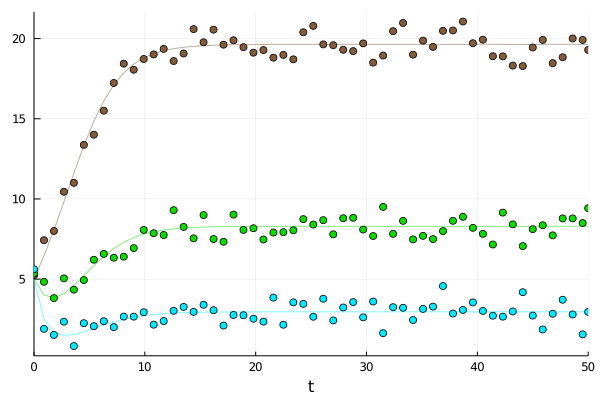

In [11]:
## Parameter inference
x0_inf = [5.; 5.; 5.]
p_inf = [0.8; 0.3; 0.1; 0.5; 1.4]
tspan = (0.0, 50.0)

ds = ODEProblem(ecomodel, x0_inf, tspan, p_inf)

sol = solve(ds,Tsit5(),saveat=.9)
targetdata = Array(sol) + 0.6*randn(size(Array(sol)))

plot(sol, alpha = 0.5, lc=cc, legend = false); scatter!(sol.t, targetdata', color=cc)


In [12]:
using Turing 
@model function fitmodel(data, ds)
    œÉ ~ InverseGamma(2, 3) 
    Œ±‚ÇÅ ~ truncated(Normal(1.0,1.0),0,3)
    Œ±‚ÇÇ ~ truncated(Normal(1.0,1.0),0,3)
    Œ¥‚ÇÅ ~ truncated(Normal(1.0,1.0),0,3)
    Œ¥‚ÇÇ ~ truncated(Normal(1.0,1.0),0,3)
    Œ¥‚ÇÉ ~ truncated(Normal(1.0,1.0),0,3)

    p = [Œ±‚ÇÅ,Œ±‚ÇÇ,Œ¥‚ÇÅ,Œ¥‚ÇÇ,Œ¥‚ÇÉ]
    prob = remake(ds, p=p)
    predicted = solve(prob,Tsit5(),saveat=.9)

    for i = 1:length(predicted)
        data[:,i] ~ MvNormal(predicted[i], œÉ)
    end
end

model = fitmodel(targetdata, ds)
@time chain = mapreduce(c -> sample(model, NUTS(.7), 1000), chainscat, 1:4)


‚îå Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
‚îî @ Base loading.jl:1278
‚îå Warning: Module NonlinearSolve with build ID 4361878138270408 is missing from the cache.
‚îÇ This may mean NonlinearSolve [8913a72c-1f9b-4ce2-8d82-65094dcecaec] does not support precompilation but is imported by a module that does.
‚îî @ Base loading.jl:1017
‚îå Warning: Module NonlinearSolve with build ID 4361878138270408 is missing from the cache.
‚îÇ This may mean NonlinearSolve [8913a72c-1f9b-4ce2-8d82-65094dcecaec] does not support precompilation but is imported by a module that does.
‚îî @ Base loading.jl:1017
‚îå Info: Skipping precompilation since __precompile__(false). Importing Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0].
‚îî @ Base loading.jl:1034
‚îå Info: Precompiling Bijectors [76274a88-744f-5084-9051-94815aaf08c4]
‚îî @ Base loading.jl:1278
‚îå Warning: Module NonlinearSolve with build ID 4361878138270408 is missing from the cache.
‚îÇ This may mean NonlinearSolve [8913a

207.538391 seconds (1.27 G allocations: 108.096 GiB, 10.27% gc time)


Chains MCMC chain (1000√ó18√ó4 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = Œ±‚ÇÅ, Œ±‚ÇÇ, Œ¥‚ÇÅ, Œ¥‚ÇÇ, Œ¥‚ÇÉ, œÉ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

          Œ±‚ÇÅ    0.8359    0.0475     0.0008    0.0022    632.5532    1.0087
          Œ±‚ÇÇ    0.3638    0.0682     0.0011    0.0034    527.7852    1.0093
          Œ¥‚ÇÅ    0.0726    0.0332     0.0005    0.0016    582.5441    1.0068
          Œ¥‚ÇÇ    0.6105    0.1162     0.0018    0.0059    530.9491    1.0093
          Œ¥‚ÇÉ    1.6969    0.3247     0.0051    0.0162    541.8280    1.0084
           œ

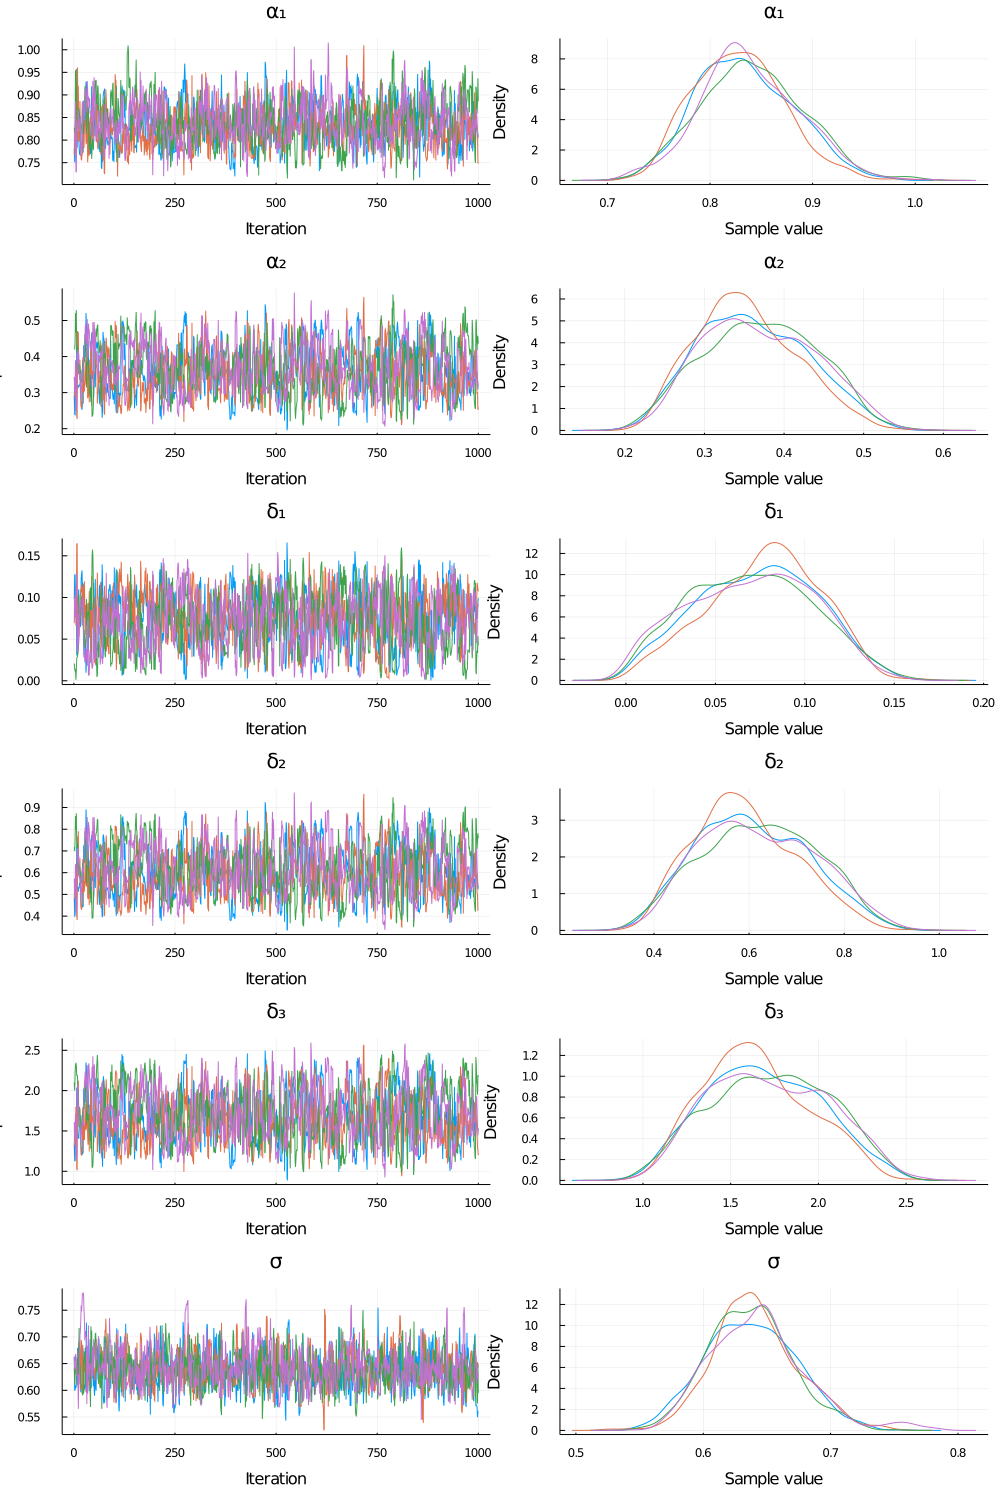

In [13]:
using StatsPlots
plot(chain)
